<a href="https://colab.research.google.com/github/ThaisFReis/Authentication/blob/main/Thais_Reis_Comp2_2024_1_Aula_3_Heran%C3%A7a_e_Polimorfismo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Computação 2 &ndash; Semana 3 &ndash; 2023.2 <br>Herança e Polimorfismo

Olá alunos! Esta semana vocês aprenderão conceitos mais avançados de POO: **herança, classes mãe e filha, sobrecarga de operadores e polimorfismo**. Lembrem-se, para acompanhar os exemplos, é necessário rodar todas as células na sequência.

Bons estudos!<br>
*Prof. Cesar Raitz*

# 1. Herança

Em algum momento, você percebeu que certas classes têm **propriedades e comportamentos muito parecidos**, com poucas diferenças. Se um comportamento for melhorado numa das classes, *você gostaria que ele fosse melhorado nas outras também*, certo? Pense num modelo de carro que ganhou um **sistema de freios melhorado**. Automaticamente, os sub-modelos dessa linha também foram beneficiados! Cada sub-modelo tem sua particularidade, **mas o sistema de freios é comum a todos**.

A POO tem um mecanismo chamado **herança**, no qual uma classe pode ser derivada de outra, reaproveitando todo o código dela. Chamamos:
* A classe derivada de **classe filha** e
* A classe original de **classe mãe**.

Dizemos que a classe filha **herda** os atributos e métodos da classe mãe.

## 1.2. Herança no Petshop

Como exemplo, vamos criar uma classe `Pet` que será usada num sistema de Petshop.

In [2]:
class Pet:
  # MÉTODO CONSTRUTOR (para inicializar o objeto)
  def __init__(self, nome, idade, dono=''):
    self.nome = nome
    self.idade = idade
    self.dono = dono

  # MÉTODO falar
  def falar(self):
    print(f'{self.nome}: ???')

# TESTE
# Vamos criar um objeto do tipo Pet,
# => um_pet é uma instância de Pet
um_pet = Pet('C3PO', 123, 'Lucas')
um_pet.falar()

C3PO: ???


Acima, uma classe `Pet` foi definida com *atributos e métodos comuns a todos os pets*. Como ainda não sabemos qual é o tipo do pet, sua fala é *???*. Então vamos implementar uma classe específica para gatos:

In [3]:
class Gato(Pet):
  #       ^^^^^
  # O nome da classe mãe fica entre parênteses

  def falar(self):
    print(f'🐱 {self.nome}: Miau!')

# TESTE
desire = Gato('Désirée', 3, 'Ana')
desire.falar()

🐱 Désirée: Miau!


* A classe mãe é `Pet`
* A classe filha é `Gato`

Então, `Gato` herdou os atributos e métodos de `Pet`, *inclusive o construtor!* No entanto, o método `fala` foi redefinido para se adequar aos gatos. Vamos parar por aí? Não! Vamos criar uma classe para cachorros também!

In [4]:
class Cachorro(Pet):
  def __init__(self, nome, idade, dono='', tem_pulgas=False):
    # Chamamos o construtor da classe mãe, para não repetir código
    super().__init__(nome, idade, dono)
    # E aproveitamos para criar mais um atributo
    self.tem_pulgas = tem_pulgas

  def falar(self):
    print(f'🐶 {self.nome}: Au!')

# TESTE
toto = Cachorro('Totó', 3, 'Túlio')
toto.falar()

🐶 Totó: Au!


No caso da classe `Cachorro`, tanto `fala` quanto o construtor foram redefinidos. Mas por que o construtor? Para adicionar uma particularidade dos doguinhos: o atributo `tem_pulgas`. Mesmo assim, também chamamos o construtor da classe mãe, `Pet.__init__()`, usando a função especial: `super()`. Podemos chamar qualquer método da classe mãe com `super()`!

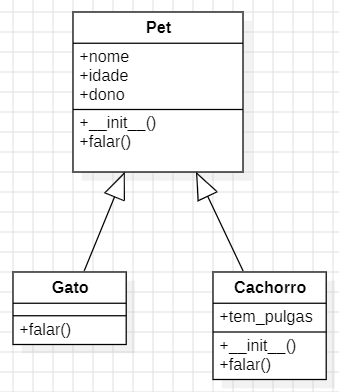

Os programadores encontraram uma forma simples de resumir as classes de um programa: são os **Diagramas UML** (de *Universal Modelling Language*). O diagrama para as classes do Petshop está na figura acima.

Cada caixinha representa uma classe:
* **Em cima** fica o nome
* **No meio** ficam os atributos
* **Em baixo** ficam os métodos

Nas classes filhas, só precisei colocar os atributos e métodos novos ou redefinidos.

#### Exercício 1 [&frac12;pt]. Classe Girafa.
Todo mundo sabe o barulho que as girafas fazem né? Suponha que você esteja programando um sistema para gerenciar zoológicos. Crie uma classe `Girafa` derivada de `Pet`. Adicione um atributo `altura` e redefina o método `falar()`. Crie umas duas instâncias de `Girafa` com alturas diferente e teste.

In [15]:
class Pet:
    def __init__(self, nome, idade, dono='', altura=None):
        self.nome = nome
        self.idade = idade
        self.dono = dono
        self.altura = altura

    def falar(self):
        print(f'{self.nome}: ???')

class Girafa(Pet):
    def __init__(self, nome, idade, dono='', altura=0):
        super().__init__(nome, idade, dono, altura)

    def falar(self):
        print(f'🦒 {self.nome}: ...')

# Teste 1
girafa1 = Girafa('Melman', 5, 'Zoo Central', 5.5)
girafa1.falar()

# Teste 2
girafa2 = Girafa('Sophie', 3, 'Zoo Safari', 4.8)
girafa2.falar()

🦒 Melman: ...
🦒 Sophie: ...


# 2. Polimorfismo

O polimorfismo é muito simples em Python, bem mais do que em outras linguagens de programação. Uma frase que resume o polimorfismo muito bem é essa aqui:
> *Se anda como um pato e fala como um pato... então é um pato!*

Vou dar um exemplo pra você entender melhor. Imagine agora que você criou uma pequena empresa de logística. O custo para transportar móveis é diferente daquele para roupas. Os impostos também são diferentes. Então podemos criar classes filhas para cada tipo de mercadoria.

In [17]:
#===============================================================================
class Mercadoria:
  def __init__(self, nome: str):
    self.nome = nome

#===============================================================================
class Movel(Mercadoria):
  # O construtor continua o mesmo

  def custo(self) -> float:
    # Vai depender também da rota de entrega, impostos, etc.
    return 100.0

#===============================================================================
class Roupa(Mercadoria):
  def custo(self) -> float:
    return 50.0

Agora vamos criar uma lista de mercadorias para uma viagem de entrega. Podemos colocar várias mercadorias na mesma lista, e não interessa se uma é móvel e outra é roupa, porque todas têm o método `custo()` e podemos calcular o custo total rapidamente:

In [18]:
entrega = [
    Movel("Sofá 3 lugares"),
    Roupa("Calças jeans"),
    Movel("Sofá-cama"),
  ]

custo_total = 0.0
for mercadoria in entrega:
  custo_total += mercadoria.custo()

print(f"O custo de armazenamento/transporte é R$ {custo_total:.2f}.")

O custo de armazenamento/transporte é R$ 250.00.


### Exercício 2 [&frac12;pt]. A Arca de Noé.

Crie uma lista com todos os `Pet` criados até agora. Na hora de zarpar, Noé confere mais uma vez sua lista fazendo uma última chamada. Use um laço **for** para iterar sobre a lista e chame o método `falar()` para cada bicho.

In [21]:
arca_de_noe = [um_pet, desire, toto, girafa1, girafa2]

for pet in arca_de_noe:
  pet.falar()

C3PO: ???
🐱 Désirée: Miau!
🐶 Totó: Au!
🦒 Melman: ...
🦒 Sophie: ...


# 3. Sobrecarga de Operadores

Você está cansado de fazer as operações mais básicas em Python, como essa aqui:

$$
3 + 5
$$

Mas sabe que até essas operações são entendidas como funções? Seria equivalente a chamar uma função `soma(3, 5)`. Na operação soma, chamamos os números de parcelas mas, de forma geral, os números são os **operANDOS** e os símbolos são os **operADORES**. Ou seja,

`operador( operando_da_esquerda, operando_da_direita )`

Esta definição é bem ampla, veja abaixo o que mais você já usou como **operando da soma**:

In [22]:
# Listas
print([1, 2] + [4, 5, 6, 7, 8, 9])

# Tuplas
print((1.11, 2.22) + (3.33, 4.44))

# Strings
print('Hello' + ' World!')

[1, 2, 4, 5, 6, 7, 8, 9]
(1.11, 2.22, 3.33, 4.44)
Hello World!


Para algumas classes, pode ser extremamente útil "dar um significado" à soma de objetos. Pense nisso, ao invés de criar uma função `soma_objeto` e ficar chamando `soma_objeto(objeto1, objeto2)`, como seria bom digitar somente `objeto1 + objeto2`!

Ficou muito abstrato? Veja o exemplo para a classe Vetor abaixo.

## 2.1. Exemplo: A classe Vetor

In [ ]:
class Vetor:
  def __init__(self, x, y):
    "Cria um vetor no plano."
    self.x = x
    self.y = y

u = Vetor(5, 3)
v = Vetor(7, 10)
print(u)
print(v)

#### Exercício 3 [&half;pt]. O vetor negativo.

Na classe Vetor, crie um método que retorne o elemento inverso do vetor $\vec{v}=(v_x, v_y)$. Isto é: $-\vec{v} = (-v_x, -v_y)$. Apresente casos de teste também.

In [29]:
class Vetor:
  def __init__(self, x, y):
    "Cria um vetor no plano."
    self.x = x
    self.y = y

  def inverso(self):
      "Retorna o vetor negativo."
      return Vetor(-self.x, -self.y)

  def __str__(self):
      return f"Vetor({self.x}, {self.y})"

# CASOS DE TESTE
v = Vetor(5, 3)
print(v)

w = v.inverso()
print(w)

Vetor(5, 3)
Vetor(-5, -3)


### Mostrando vetores

O Python tem essa forma peculiar de mostrar os objetos:
```
<__main__.Vetor object at 0x7a9873461690>
```
com o **nome da classe** e a **posição dos dados** na memória RAM (em hexadecimal). Podemos melhorar isso! Vamos olhar o método especial `__str__()`. Trata-se de um operador para **converter o objeto em string**.

In [30]:
class Vetor:
  def __init__(self, x, y):
    "Cria um vetor no plano."
    self.x = x
    self.y = y

  def __str__(self):
    "Retorna uma string quando necessário."
    return f'({self.x}, {self.y})'

u = Vetor(5, 3)
v = Vetor(7, 10)
# Converte sob demanda
su = str(u)
sv = str(v)
# Converte automaticamente para string
print(u)
print(v)

(5, 3)
(7, 10)


Você pode pedir a conversão explicitamente com a função `str()` ou, de forma implícita, quando passa o objeto como argumento para `print()`.

### Soma de vetores

Agora, vamos realizar a soma $\vec{s} = \vec{u} + \vec{v}$.

In [ ]:
print(u)
print(v)
sx = u.x + v.x
sy = u.y + v.y
s = Vetor(sx, sy)
print(s)

Funcionou certo? Mas repetir o código acima, toda vez que precisarmos somar vetores, **pode levar a erros**. Pra facilitar nossa vida vamos definir o **operador soma** com o método `__add__()`.

In [ ]:
class Vetor:
  def __init__(self, x, y):
    "Cria um vetor no plano."
    self.x = x
    self.y = y

  def __str__(self):
    "Retorna uma string quando necessário."
    return f'({self.x}, {self.y})'

  def __add__(self, v):
    "Calcula self + v."
    # self é o operando da esquerda
    #    v é o operando da direita
    x = self.x + v.x
    y = self.y + v.y
    return Vetor(x, y)

u = Vetor(5, 3)
v = Vetor(7, 10)
s = u + v
print(s)

Viu como facilitou? 😎

Vamos pensar agora numa operação inédita no mundo dos vetores: **a soma de um vetor com um escalar!** 😱 Funciona assim: cada componente do vetor original é somada ao escalar para gerar o vetor resultante. Primeiro, vamos tentar fazer isso sem alterar a classe `Vetor`, só pra ver o Python reclamar:

In [31]:
u + 5

TypeError: unsupported operand type(s) for +: 'Vetor' and 'int'

Agora vamos incluir a nova funcionalidade em `__add__()`.

In [32]:
def isnum(x) -> bool:
  "Retorna True se x for um número."
  return isinstance(x, (int, float, complex))


class Vetor:
  def __init__(self, x, y):
    "Cria um vetor no plano."
    self.x = x
    self.y = y

  def __str__(self):
    "Retorna uma string quando necessário."
    return f'({self.x}, {self.y})'

  def __add__(self, v):
    "Calcula self + v."
    if isnum(v):
      x = self.x + v    # v é escalar
      y = self.y + v
    else:
      x = self.x + v.x  # v é vetor
      y = self.y + v.y
    return Vetor(x, y)

u = Vetor(5, 3)
s = u + 5
print(s)

(10, 8)


Usamos `isinstance()` para saber se o operando da direita (parâmetro `v`) é um número. Se for, o código dentro do `if` calcula as componentes daquela forma que combinamos.

Seria bom se acabasse por aí, mas **nem tudo são flores!** Se você escrever `5 + u`, não vai funcionar! Pois **colocamos o vetor à direita do número**. Nós sabemos que o resultado será o mesmo, porque a soma é **comutativa**. *Mas o Python ainda não sabe disso!* Para ele, **somar à esquerda ou à direita** são coisas diferentes. Para avisá-lo que funciona, precisamos escrever o método `__radd__()` (r de *right*).

In [33]:
# Primeiro, veja que não funciona
u = Vetor(5, 3)
s = 5 + u
print(s)

TypeError: unsupported operand type(s) for +: 'int' and 'Vetor'

Agora vamos dar uma melhorada na classe `Vetor`:

In [35]:
class Vetor:
  def __init__(self, x, y):
    "Cria um vetor no plano."
    self.x = x
    self.y = y

  def __str__(self):
    "Retorna uma string quando necessário."
    return f'({self.x}, {self.y})'

  def __add__(self, v):
    "Calcula self + v."
    if isnum(v):
      x = self.x + v
      y = self.y + v
    else:
      x = self.x + v.x
      y = self.y + v.y
    return Vetor(x, y)

  def __radd__(self, v):
    "Calcula v + self."
    return self + v     # Equivale a: return self.__add__(v)

u = Vetor(5, 3)
s = 5 + u
print(s)

(10, 8)


Poderíamos ter copiado o código de `__add__()` em `__radd__()`. Ao invés disso, chamamos a função `__add__()` (com o símbolo +) para gerar o resultado, pois bem sabemos que podemos colocar o escalar *à direita* do operador: `5 + u = u + 5`.

### Subtraindo vetores

#### Exercício 4. [&half;pt]

Na célula abaixo, modifique a classe `Vetor` para disponibilizar a operação de subtração por vetor/escalar. Os métodos para subtração são `__sub__()` e `__rsub__()`. Minha sugestão para isso é transformar a subtração numa soma.

* `self` à esquerda com `__sub__()`:
  * $\vec{a} - x = \vec{a} + (-x) $
  * $\vec{a} - \vec{b} = \vec{a} + (-\vec{b}) $
* `self` à direita com `__rsub__()`:
  * $x - \vec{a} = x + (-\vec{a})$

In [40]:
def isnum(x) -> bool:
    "Retorna True se x for um número."
    return isinstance(x, (int, float, complex))

class Vetor:
    def __init__(self, x, y):
        "Cria um vetor no plano."
        self.x = x
        self.y = y

    def __str__(self):
        "Retorna uma string quando necessário."
        return f'({self.x}, {self.y})'

    def __add__(self, v):
        "Calcula self + v."
        if isnum(v):
            x = self.x + v    # v é escalar
            y = self.y + v
        else:
            x = self.x + v.x  # v é vetor
            y = self.y + v.y
        return Vetor(x, y)

    def __radd__(self, v):
        "Calcula v + self."
        return self + v     # Equivale a: return self.__add__(v)

    def __sub__(self, v):
        "Calcula self - v."
        if isnum(v):
            x = self.x - v    # v é escalar
            y = self.y - v
        else:
            x = self.x - v.x  # v é vetor
            y = self.y - v.y
        return Vetor(x, y)

    def __rsub__(self, v):
        "Calcula v - self."
        if isnum(v):
            x = v - self.x    # v é escalar
            y = v - self.y
        else:
            x = v.x - self.x  # v é vetor
            y = v.y - self.y
        return Vetor(x, y)

# CASOS DE TESTE
u = Vetor(5, 3)
v = Vetor(3, 5)
print(u - v)     # Deve imprimir: (2, -2)
print(v - u)     # Deve imprimir: (-2, 2)
print(5 - u)     # Deve imprimir: (0, 2)
print(u - 5)     # Deve imprimir: (0, -2)


(2, -2)
(-2, 2)
(0, 2)
(0, -2)


# Avalie

O que você achou deste notebook? Dê uma nota de 1 a 5:

In [39]:
nota = 5
if 1 <= nota <= 5:
  print("O que achei do notebook: " + "😨😞😐🙂🥰"[nota-1])
else:
  print("Sem nota")

O que achei do notebook: 🥰


Como melhorar este notebook? Você tem alguma sugestão? Dê dois cliques e responda aqui.